<a href="https://colab.research.google.com/github/ytyc2k/APPS/blob/master/StockProphet.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Cloning into 'Stocker'...
remote: Enumerating objects: 10, done.
remote: Total 10 (delta 0), reused 0 (delta 0), pack-reused 10
Unpacking objects: 100% (10/10), done.
    100% |████████████████████████████████| 15.0MB 1.1MB/s 
    100% |████████████████████████████████| 17.2MB 1.9MB/s 
    100% |████████████████████████████████| 55.1MB 613kB/s 
    100% |████████████████████████████████| 61kB 21.1MB/s 
    100% |████████████████████████████████| 2.3MB 10.9MB/s 
    100% |████████████████████████████████| 102kB 27.9MB/s 
  Stored in directory: /root/.cache/pip/wheels/71/b3/f1/e6668a53f3d537b5c160dbc13c7d463893a28c67d6c9c4fe20
  Stored in directory: /root/.cache/pip/wheels/9f/5a/d3/6fc3bf6516d2a3eb7e18f9f28b472110b59325f3f258fe9211
Successfully built fbprophet inflection
spacy 2.0.18 has requirement numpy>=1.15.0, but you'll have numpy 1.14.0 which is incompatible.
imgaug 0.2.8 has requirement numpy>=1.15.0, but you'll have numpy 1.14.0 which is incompatible.
featuretools 0.4.1 has requi

the stock Stocker Initialized. Data covers 2016-09-14 00:00:00 to 2019-03-15 00:00:00.
Predicted Price on 2019-04-14 00:00:00 = $14.82


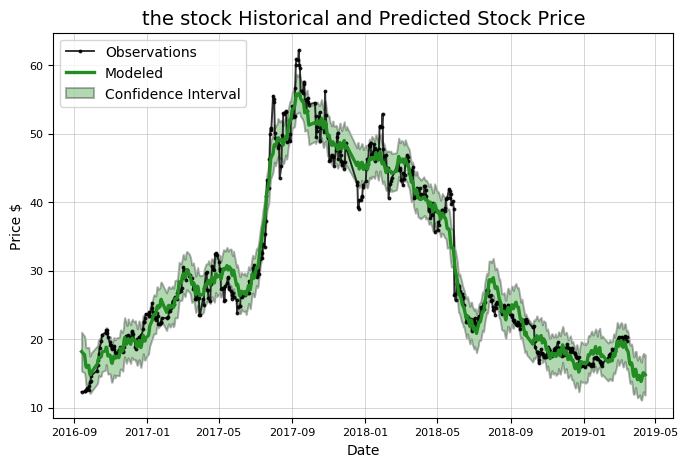


Prediction Range: 2018-03-15 00:00:00 to 2019-03-15 00:00:00.

Predicted price on 2019-03-14 00:00:00 = $49.73.
Actual price on    2019-03-14 00:00:00 = $44.77.

Average Absolute Error on Training Data = $1.39.
Average Absolute Error on Testing  Data = $23.92.

When the model predicted an increase, the price increased 52.50% of the time.
When the model predicted a  decrease, the price decreased  49.18% of the time.

The actual value was within the 80% confidence interval 10.70% of the time.


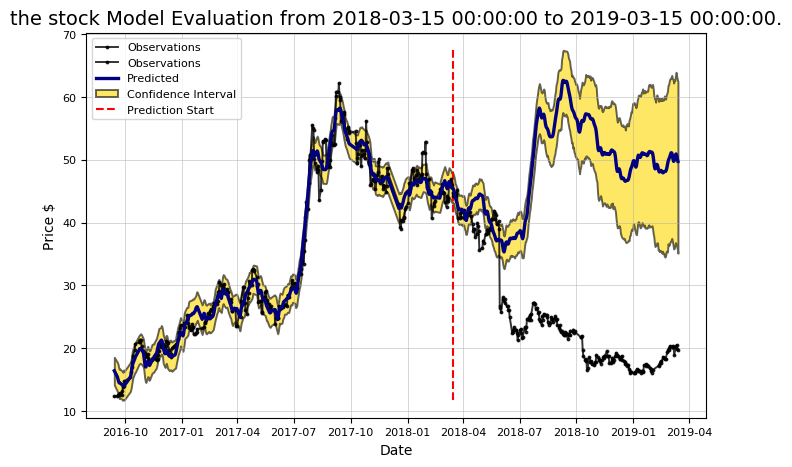

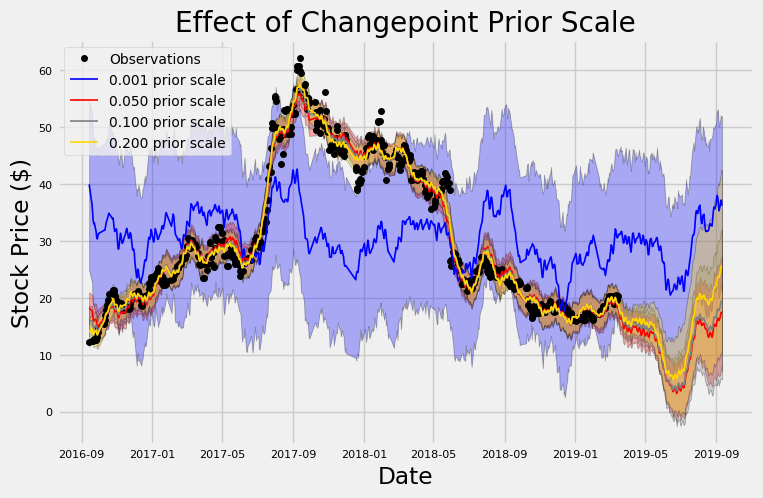


Predicted Increase: 

         Date   estimate    change      upper      lower
6  2019-03-21  17.311034  0.094930  19.504308  14.807458
7  2019-03-22  17.459018  0.147984  19.681381  15.067099
12 2019-03-27  16.063179  0.209203  18.381863  13.467434
13 2019-03-28  16.462192  0.399013  18.866757  14.158307
14 2019-03-29  16.602320  0.140129  19.000613  14.234743
18 2019-04-02  15.440910  0.063452  17.841737  12.804555
19 2019-04-03  15.745022  0.304112  18.271252  13.372272
20 2019-04-04  15.893971  0.148950  18.316996  13.420584
24 2019-04-08  15.237554  0.227069  17.817986  12.755545
25 2019-04-09  15.782257  0.544703  18.293716  13.020594
26 2019-04-10  16.249675  0.467418  18.894474  13.780397
27 2019-04-11  16.351896  0.102220  19.081453  13.871281
31 2019-04-15  16.272449  0.234515  18.856301  13.658535
32 2019-04-16  16.380801  0.108352  19.022251  13.608311
37 2019-04-21  16.139383  0.551437  18.821842  13.259723
38 2019-04-22  16.362713  0.223329  19.051581  13.602692
42 2019-

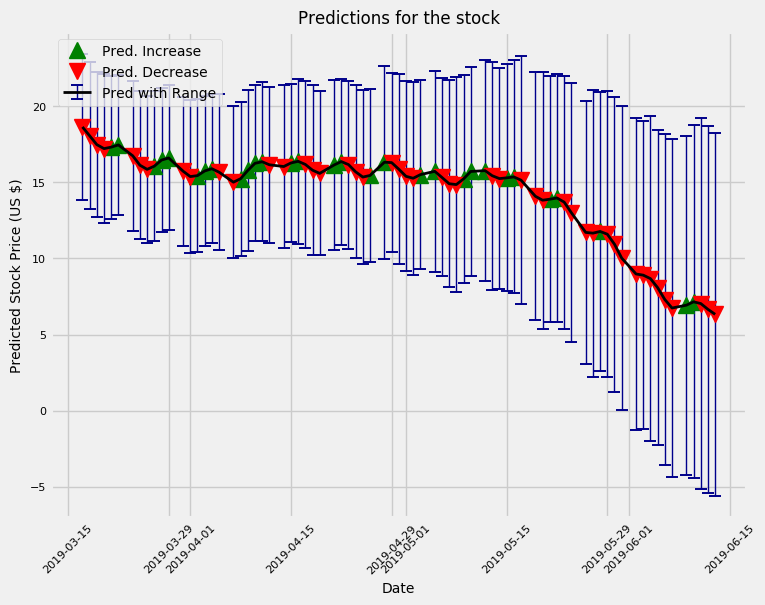

In [5]:
!git clone https://github.com/koreal6803/Stocker.git
!pip install -r Stocker/requirements.txt
!pip install tushare

import tushare
# HisPrice=tushare.get_hist_data('601155')
HisPrice=tushare.get_hist_data('600230')
HisPrice.to_csv('price.csv')

import warnings
warnings.filterwarnings('ignore')

import pandas as pd
df = pd.read_csv('price.csv',usecols=[0,3],index_col='date', parse_dates=['date'])
price = df.squeeze()

from Stocker.stocker import Stocker
tsmc = Stocker(price)
model, model_data = tsmc.create_prophet_model(days=30)
tsmc.evaluate_prediction()
tsmc.changepoint_prior_analysis(changepoint_priors=[0.001, 0.05, 0.1, 0.2])
tsmc.predict_future(days=90)

# New Section